## A messy notebook full of B-Splines

I made this notebook to work out how to manipulate parameterized B-Splines, compute their derivative and arc lengths, and then computing the array of parameters subject to equal arc length (in XY-space rather than parameter space)..

In [76]:
# we need to compute arc lengths... import stuff
# put the figures inline
%matplotlib inline

# a variety of tools we'll be using
import matplotlib.pyplot as plt
import copy
import numpy as np 
import scipy as sci
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# some parameters we pass to make our matplotlib figures look nice...
# -- see http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

computed length 0.881373675746
actual length:  0.88137358702


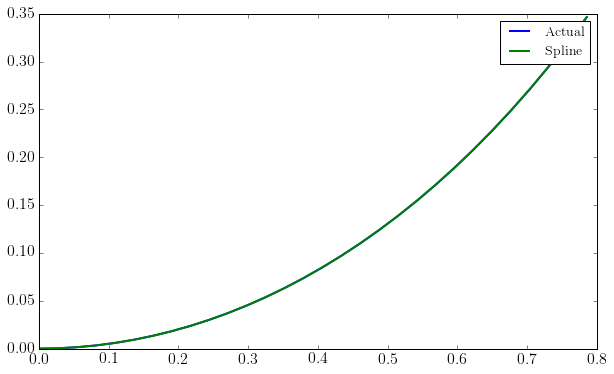

In [77]:
#e.g., determine the arc length of y = ln(sec x) between [0, pi/4]
x = np.linspace(0, np.pi / 4.0, 30)
y = np.log(1.0 / np.cos(x))

#print "x value: ", x
#print "y value; ", y

#print "x 0 index: ", x[0]
#print "x -1 index: ", x[-1]
# get a cubic spline between the y datapoints...

thisSpline= interpolate.splrep(x, y)

def getSplineValue(xval):
    yval = interpolate.splev(xval,thisSpline)
    return yval


def splineDeriv(xval): 
    value = interpolate.splev(xval,thisSpline,der=1)
    return value

def getArcLength(xval):
    value = np.sqrt(1 + (splineDeriv(xval) ** 2.0) )
    return value

    
yvals = getSplineValue(x)
#print yvals

length = sci.integrate.quadrature(getArcLength, x[0], x[-1])
print "computed length", length[0]
actualLength = np.log( np.sqrt(2) + 1)
print "actual length: ", actualLength

plt.figure()
plt.plot(x,y)
plt.plot(x,yvals)
plt.legend(['Actual','Spline'])
plt.show()
#print "thisSpline: ", thisSpline

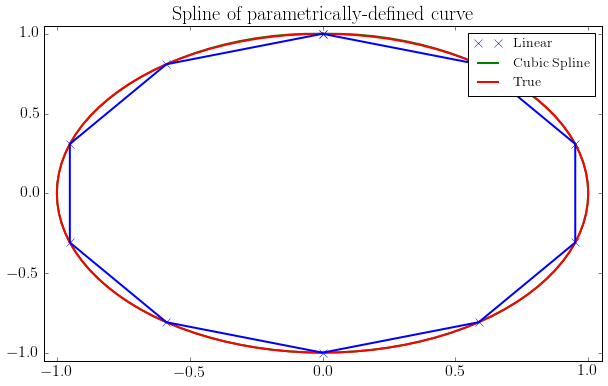

actual arc length:  6.28318530718


In [78]:
# now, let's do something a bit more complex
# -- taken from https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/interpolate.html
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

# note.. we know that the arc length is 2pi, because this is just a circle! so, 
print "actual arc length: ", 2 * np.pi

def getSplineValue(xval):
    yval = interpolate.splev(xval,thisSpline)
    return yval

def splineDeriv(uval): 
    value = interpolate.splev(uval,thisSpline,der=1)
    #print "value: ", value
    return value

def getArcLength(xval):
    
    value = np.sqrt(1 + (splineDeriv(xval) ** 2.0) )
    return value


In [79]:
arcLength = 0.0
deltaUnew = unew[1] - unew[0]

def splineDeriv2(uval): 
    value = interpolate.splev(uval,tck,der=1)
    return value

def getArcLength2(uval):
    dxdy = splineDeriv2(uval)
    dxdu= dxdy[0]
    dydu = dxdy[1]
    #print splineDeriv2(uval)
    value = np.sqrt( (dxdu ** 2.0)  + (dydu ** 2.0))
    return value

arcLength = 0.0
#print unew
for index in range(len(unew) - 1):
    integralEval, errorEval = sci.integrate.quadrature(getArcLength2, unew[index], unew[index+1])
    #print integralEval
    arcLength += integralEval
        
#arcLength = sci.integrate.quadrature(getArcLength, unew[0], unew[-1])
print arcLength
print 2.0 * np.pi

6.28451502987
6.28318530718


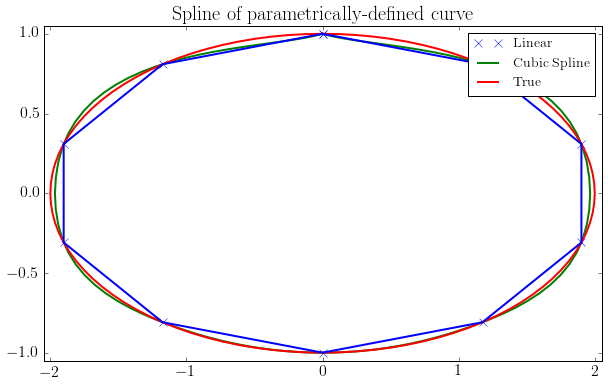

In [80]:
# let's do something with /unequal/ arc lengths around a similar shape: an ellipse!
t = np.arange(0, 1.1, .1)
x = 2.0 * np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], 2.0 * np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-2.05, 2.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

In [81]:
# clearly our cubic spline is a /little/ off, but we'll make do.  the circumference of an ellipse with major
# axis of radius 2 (x) and 1 (y) is approximately 9.68845.. so let's see how we do
def splineDeriv2(uval): 
    value = interpolate.splev(uval,tck,der=1)
    return value

def getArcLength2(uval):
    dxdy = splineDeriv2(uval)
    dxdu= dxdy[0]
    dydu = dxdy[1]
    #print splineDeriv2(uval)
    value = np.sqrt( (dxdu ** 2.0)  + (dydu ** 2.0))
    return value

arcLength = 0.0
#print unew
for index in range(len(unew) - 1):
    integralEval, errorEval = sci.integrate.quadrature(getArcLength2, unew[index], unew[index+1])
    #print integralEval
    arcLength += integralEval
        
#arcLength = sci.integrate.quadrature(getArcLength, unew[0], unew[-1])
print arcLength

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]
9.68489095868


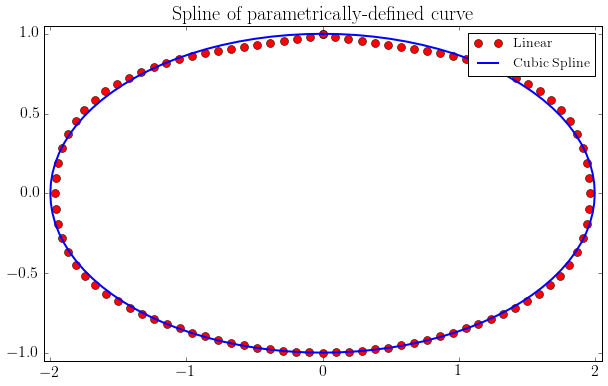

0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.0646096069906
0.064609

In [85]:
# close enough! 9.68489... vs 9.68845.  very good.

# what about if we redistribute our sample points x, y along this curve? we want to integrate for constant arc 
# length...
arcLengthBySection = arcLength / (len(unew) - 1)
# fprint arcLengthBySection

def splineDeriv3(uval):
    value = interpolate.splev(uval,tck,der=1)
    return value

def getArcLength3(uval):
    dxdy = splineDeriv3(uval)
    dxdu = dxdy[0]
    dydu = dxdy[1]
    value = np.sqrt( (dxdu ** 2.0) + (dydu ** 2.0))
    return value

def evalArcLengthToZero(upperBound):
    # thisArcLength = getArcLength3(uval)
    thisArcLength, errorEval = sci.integrate.quadrature(getArcLength3,beginValue,upperBound)
    return thisArcLength - arcLengthBySection

# we begin with unew[0] as our starting point.. we'll be calculating the values of u such that our (x,y) distance 
# is uniform between sequential values of u, rather than having equal distance between sequential values of u and 
# nonuniform distance between their corresponding x-y values.  

# i.e., our uniformity is being transferred from u-space to xy-space
beginValue = unew[0]
uValsInXYSpace = []
uValsInXYSpace.append(beginValue)
unewResolution = unew[1] - unew[0]
for i in range(len(unew) - 2):
    guess = beginValue + unewResolution
    nextValue = sci.optimize.fsolve(evalArcLengthToZero,guess)
    # print "nextValue",  nextValue
    uValsInXYSpace.append(nextValue)
    beginValue = nextValue # and, append it to this list...

uValsInXYSpace.append(unew[-1])


# let's verify that what we've done is correct.
t = np.arange(0, 1.1, .1)
x = 2.0 * np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(uValsInXYSpace, tck)
plt.figure()
plt.plot(out[0], out[1], 'ro',2.0 * np.sin(2*np.pi*unew), np.cos(2*np.pi*unew),'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-2.05, 2.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

for i in range(len(uValsInXYSpace) - 1):
    integralEval, errorEval = sci.integrate.quadrature(getArcLength2, unew[index], unew[index+1])
    # integral eval holds the value of our arc length between the points unew[index] and unew[index+1]!
    # -- we expect that this value is the same every time, since we solve for equal arc lengths!
    print integralEval
    #arcLength += integralEval
    #print 
    
#for i in range(len(uValsInXYSpace) - 1):
    # print out the difference between sequential values in u-space
    # -- we expect that these values are /not/ the same, since we solved for equal arc lengths in XY-space
#    print uValsInXYSpace[i+1] - uValsInXYSpace[i]
    
    # nice.